So far, you've learned how to plot with matplotlib and the default plotting options included in Pandas. You have created lineplots, scatterplots, histograms, qq plots, and boxplots.

In each case, we've striven to adhere to some basic principles:

Plots should be as clean and simple as possible, including exactly as much information as is needed to make your point but no more.
Plots should be informatively labelled, with titles and axes in plain language the reader can easily understand. Remember, someone shouldn't have to read your code to understand what's being presented.
Basic plots show every datapoint. Statistical plotting aggregates information to highlight features of data.
Let your choice of plot be guided by the data.
We've also seen how to use basic plots as a way to orient ourselves to our data.

Explore the relationship between two variables with scatterplots.
Explore the distribution of a variable and any outliers with histograms.
Explore the distribution and any outliers using QQ plots.
Comparing groups and identifying variance and outliers using boxplots.
In this checkpoint, we'll revisit these ideas using Seaborn, which is a visualization library that looks better out of the box than the visualizations we get from Matplotlib.

Here's what we'll cover:

data exploration with common plots
- Seaborn
- Bar plots
- pointplots
- scatterplots
At the end of this checkpoint, you'll create these kinds of plots in Seaborn in order to explore datasets of your choosing.

## Pretty plots: Formatting, subplots, and seaborn
An attractive, well-laid-out plot is worth its weight in cliches. Compare the following three attempts to plot data on tips given to servers from men and women at lunch and dinner. The goal is to find out generally who tips more and what mealtime generates bigger tips. Don't worry about the code for now, we'll get to that in a minute.

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2


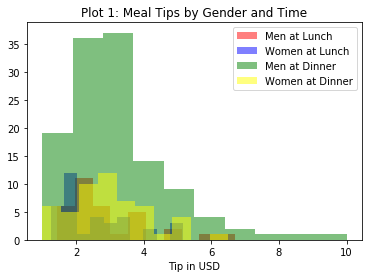

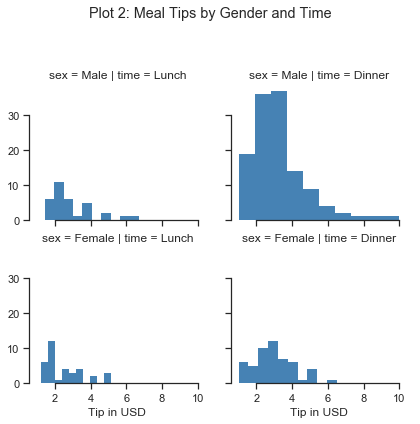

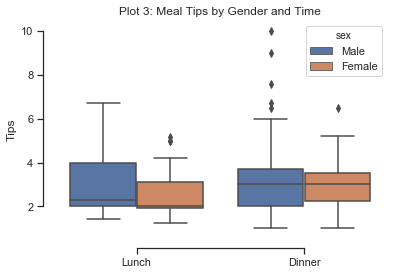

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading an example dataset provided by the seaborn package.
tips = sns.load_dataset("tips")
print(tips.head(n=4))

# Creating variables for each of the four conditions to graph using the basic
# matplotlib functionality.
menlunchtip = tips.loc[(tips['sex']=='Male')&(tips['time']=='Lunch'),'tip']
womenlunchtip = tips.loc[(tips['sex']=='Female')&(tips['time']=='Lunch'),'tip']
mendinnertip = tips.loc[(tips['sex']=='Male')&(tips['time']=='Dinner'),'tip']
womendinnertip = tips.loc[(tips['sex']=='Female')&(tips['time']=='Dinner'),'tip']

# Making overlapping histograms.
plt.hist(menlunchtip, color='red',  alpha=.5,label='Men at Lunch')  # alpha just controls the opacity
plt.hist(womenlunchtip, color='blue', alpha=.5,label='Women at Lunch')
plt.hist(mendinnertip, color='green', alpha=.5,label='Men at Dinner')  
plt.hist(womendinnertip, color='yellow', alpha=.5,label='Women at Dinner')
plt.xlabel('Tip in USD')
plt.legend(loc='upper right')
plt.title('Plot 1: Meal Tips by Gender and Time')
plt.show()

# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data. Creates all unique combinations of sex and time.
g = sns.FacetGrid(tips, row="sex", col="time")
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "tip", color="steelblue",  lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.8)
# Making a more informative axis name.
g.set_axis_labels('Tip in USD')
plt.suptitle('Plot 2: Meal Tips by Gender and Time')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

# Comparing groups using boxplots.
ax = sns.boxplot(x='time',y='tip',hue='sex',data=tips)  
plt.title('Plot 3: Meal Tips by Gender and Time')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')

plt.show()

Of the three plots showing tips at lunch and dinner by men and women, Plot 1 is basically useless. The bars overlap so much that it isn't possible to see what is happening in the blue and red groups at all. All we can know for sure is that there is more data in the men at dinner group, that no one in the sample gave a tip of 0, and that the highest tip was 10.

Plot 2 is better. It contains all of the information from Plot 1, but separates the groups into subplots so we can actually see them. All four subplots are scaled so that they have the same x-axis, ranging from 0 to 40, and the same y-axis, ranging from 0 to 12. We see at a glance that most of the data is coming from men at dinner. With some effort, by comparing subplots we can also see that men appear to tip more than women at both lunch and dinner, and that tips are higher at dinner than at lunch.

Even this plot can be improved, because it contains a lot of unnecessary information. Plot 3, on the other hand, has just the information we need most if we want to compare how tipping behavior generally works in each group. We see at a glance that women tip less at lunch than men, but tip similarly at dinner. With some effort, we can also see that tipping is higher at dinner.

We can plot the same data to emphasize differences in mealtime:

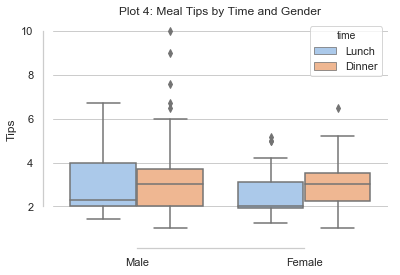

In [2]:
#Comparing groups again, but with a different emphasis.

# Setting the overall aesthetic.
sns.set(style="whitegrid")

ax = sns.boxplot(x='sex',y='tip',hue='time',data=tips,palette='pastel')  

plt.title('Plot 4: Meal Tips by Time and Gender')

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')

plt.show()

Here it is obvious that dinner generates higher tips than lunch, and that this is true for both men and women. It is harder to see whether men or women tip more on average.

Plots 3 and 4 are equally good, but they emphasize different things. Let your question guide your plot choices.

## Thinking Like a Data Scientist
As a general rule of thumb, a plot that requires someone to think hard to understand it is a bad plot. When you're nose-deep in data every plot you make will be easy for you to understand, so make sure to show your plots to someone else and see what they say. If they don't get it, change it! As in writing, so in plotting: Kill your darlings.

## Seaborn
If you remember the plots we made in the prep course, you may be thinking that the ones you see here are a lot more attractive. With the exception of Plot 1, these were made using the Python package Seaborn. Built on top of matplotlib, Seaborn is more powerful, more flexible, and has much nicer default options. Now that you are more comfortable with Python, we recommend moving your plotting to Seaborn. This example gallery will give you a sense of what you can do. You can install seaborn with pip install seaborn and import it once installed with import seaborn as sns, as we did above.

Here's some other ways of visualizing the tips data, courtesy of Seaborn:

## Bar Plot
Barplots are the most commonly used method for visualizing grouped data. Bar plots often show the mean (though they are also often used for counts), sometimes with an error bar representing some measure of variance. Below, we use the 95% confidence interval.

Barplots are also called 'dynamite plots' because each bar with its error resembles a stick of dynamite.

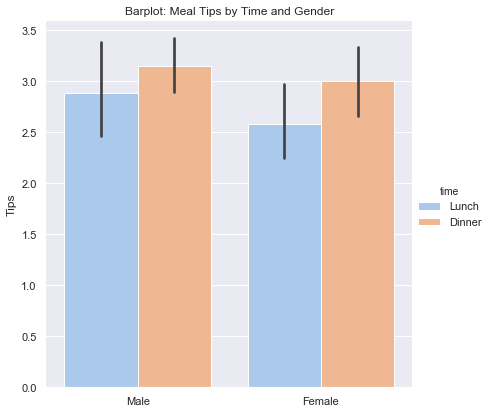

In [3]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")

# Use catplot (previous versions of seaborn use factorplot)
g = sns.catplot(x="sex", y="tip", hue="time", data=tips,
                   height=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Tips")
g.set_xlabels("")
plt.title('Barplot: Meal Tips by Time and Gender')
plt.show()

While barplots are common, people also object to them for two reasons. The first is that they are inefficient: the space between 0.0 and 2.0 is wasted. Yet because the height of the bars is what conveys size, the bar has to start at 0. The second is that they can be misleading, because the brain looks at the difference between the groups relative to the total height of the bars. A difference of two points can look much more exciting on bars with a maximum height of 4 rather than a maximum height of 20. This is a problem because group differences should be evaluated based on the size of the error bars, not the height of the bars itself. Look at some bad barplots in real life.

People who dislike dynamite plots recommend boxplots or pointplots instead. However, in business barplots are still very common and expected.

## Pointplot
A pointplot has all the strengths of a barplot without many of its weaknesses. Pointplots use much less space to convey the same information, and the difference in size between the groups is rightly compared to the size of the error bars.

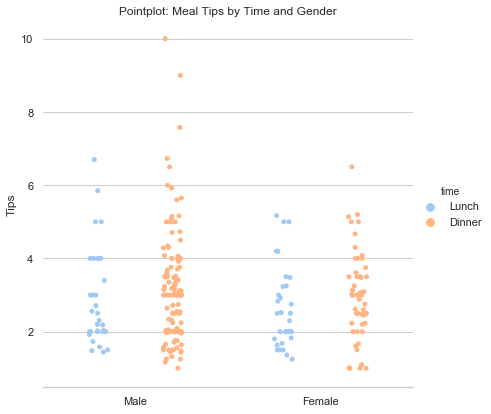

In [4]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")

g = sns.catplot(x="sex", y="tip", hue="time", data=tips,
                   height=6, kind="strip", palette="pastel",ci=95,dodge=True)
g.despine(left=True)
g.set_ylabels("Tips")
g.set_xlabels("")
plt.title('Pointplot: Meal Tips by Time and Gender')
plt.show()

## Visualizing Two Continuous Variables
So far, all these graphs have focused on one continuous variable, tips, and two categorical variables, gender and time. Visualizing two continuous variables together involves a different type of plot.

## Scatterplot
Scatterplots are bread and butter for a data scientist. They may appear with or without a 'fit' line that attempts to summarize the relationship between the variables.

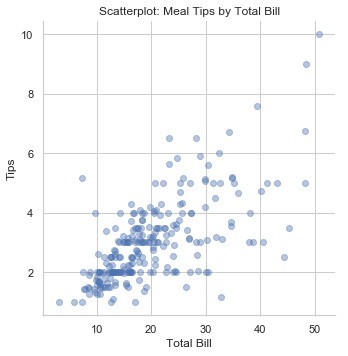

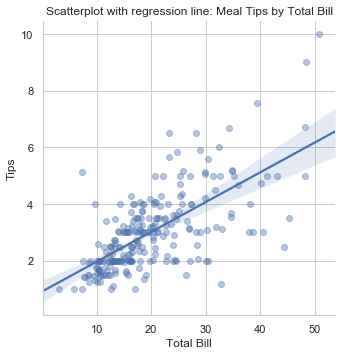

In [5]:
g = sns.lmplot(y='tip', # Variable 1.
               x='total_bill', # Variable 2.
               data=tips, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlapping points.
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.title('Scatterplot: Meal Tips by Total Bill')
plt.show()

g = sns.lmplot(y='tip', 
               x='total_bill',
               data=tips, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.title('Scatterplot with regression line: Meal Tips by Total Bill')
plt.show()

As before, we can split the data and plot by groups.

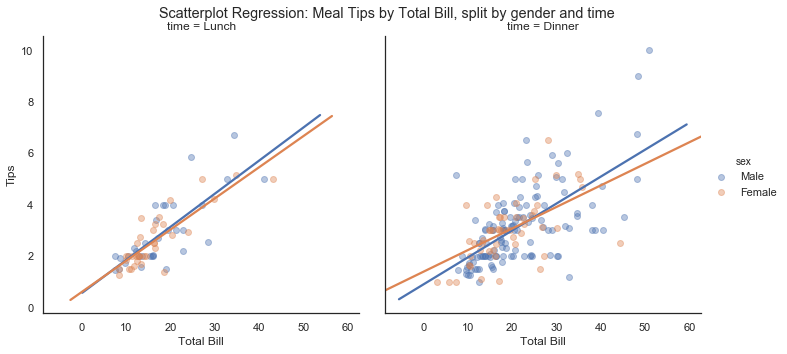

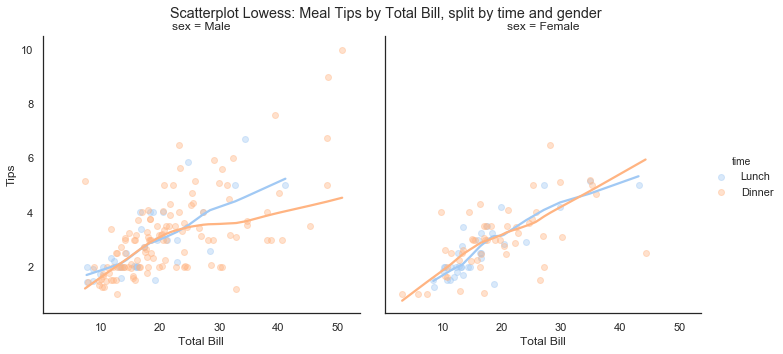

In [6]:
# Setting the overall aesthetic.
sns.set(style="white")

g = sns.lmplot(y='tip', 
               x='total_bill',
               hue='sex',
               data=tips, # Data.
               col='time',
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.suptitle('Scatterplot Regression: Meal Tips by Total Bill, split by gender and time')
plt.subplots_adjust(top=0.9)
plt.show()

g = sns.lmplot(y='tip', 
               x='total_bill',
               hue='time',
               data=tips, # Data.
               col='sex',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.suptitle('Scatterplot Lowess: Meal Tips by Total Bill, split by time and gender')
plt.subplots_adjust(top=0.9)
plt.show()

## General guidelines
There are many more types of plots, and an infinite number of ways to combine them. Seaborn is powerful and flexible, and will probably meet most of your day-to-day plotting needs. More complex visualizations are a specialization within data science that we will touch on towards the end of the course.

## Assignments
The best way to learn plotting is to make a lot of plots. To complete the following you may need to explore the seaborn documentation.

1. Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:
 - Choose one variable and plot that variable four different ways.
 - Choose two continuous variables, and plot them three different ways.
 - Choose one continuous variable and one categorical variable, and plot them six different ways.
 - Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

2. Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
 - Probability distributions
 - Bivariate relationships
 - Whether the distributions or the relationships vary across groups
 - Accompany your plot with a written description of what you see.

When you've completed these exercises, share your results with your mentor.

In [7]:
nyc = pd.read_csv('/Users/carandu/thinkful_projects/data_visualization_and_exploration/AB_NYC_2019.csv')

In [8]:
nyc.columns = ['id', 'name', 'host_id', 'host_name', 'borough', 'hood', 'latitude', 'longitude', 'room_type', 'price', 'min', 'reviews', 'last_review', 'reviews_per_month', 'host_listings_count', 'availability_365']

In [9]:
manhattan = nyc[nyc['borough'] == 'Manhattan']
brooklyn = nyc[nyc['borough'] == 'Brooklyn']
queens = nyc[nyc['borough'] == 'Queens']
bronx = nyc[nyc['borough'] == 'Bronx']
staten_island = nyc[nyc['borough'] == 'Staten Island']
nyc.head()


,id,name,host_id,host_name,borough,hood,latitude,longitude,room_type,price,min,reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
popular = nyc.groupby(['borough','hood'])['id'].count().reset_index()
cheapest = nyc.groupby(['borough', 'hood'])['price'].mean().reset_index()
manhattan_count = nyc.loc[(nyc['borough']=='Manhattan'),'id'].count() ## Is this a scalar?
popular.sort_values(by='id', ascending=False)
cheapest.sort_values(by='price', ascending=False).round(-1)
ranges = nyc.groupby(['borough', 'hood']).agg({'price': ['min','max','mean','median','count']}).round(1).reset_index()
ranges
ranges.columns = ['Boro', 'Neighbourhood', 'Min', 'Max', 'Mean', 'Median','Total']#eliminates the multi-index!
ranges.columns

Index(['Boro', 'Neighbourhood', 'Min', 'Max', 'Mean', 'Median', 'Total'], dtype='object')

In [11]:
ranges = ranges.sort_values(by='Total', ascending=False).round(1)
ranges_under_500 = ranges[ranges.Total <= 500]
ranges_under_500.head()

,Boro,Neighbourhood,Min,Max,Mean,Median,Total
70,Brooklyn,East Flatbush,15,7500,104.2,75.0,500
74,Brooklyn,Fort Greene,25,1200,151.4,130.0,489
114,Manhattan,Murray Hill,0,2000,221.0,190.0,485
108,Manhattan,Kips Bay,10,2750,202.4,152.0,470
145,Queens,Flushing,15,1500,93.5,65.0,426


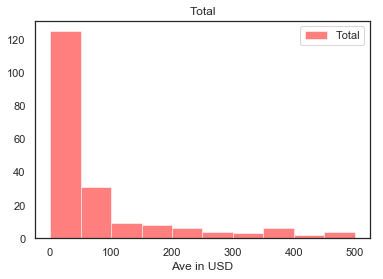

In [12]:
plt.hist(ranges_under_500['Total'], color='red',  alpha=.5,label='Total')  # alpha just controls the opacity
#plt.hist(ranges['Minumum'], color='blue', alpha=.5,label='Min')
#plt.hist(ranges['Maximum'], color='green', alpha=.5,label='Min')
#plt.hist(mendinnertip, color='green', alpha=.5,label='Men at Dinner')  
#plt.hist(womendinnertip, color='yellow', alpha=.5,label='Women at Dinner')
plt.xlabel('Ave in USD')
plt.legend(loc='upper right')
plt.title('Total')
plt.show()


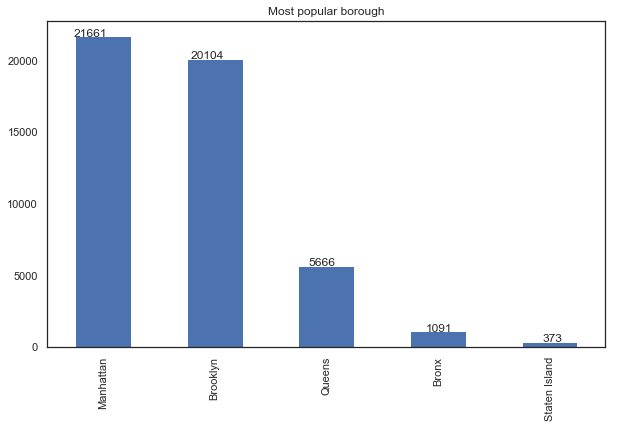

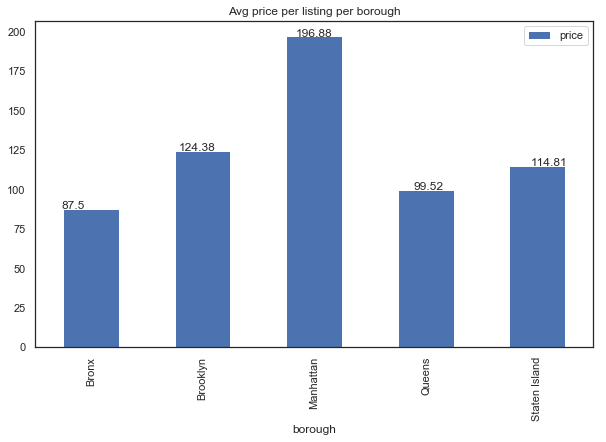

In [13]:
counts = nyc.borough.value_counts()#.plot(kind='bar')
average = nyc.groupby('borough').agg({'price': 'mean'})
ax = counts.plot(kind='bar', title='Most popular borough', figsize=(10, 6))
av = average.plot(kind='bar', title='Avg price per listing per borough', figsize=(10, 6))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height()*1))    
for p in av.patches:
    av.annotate(str(p.get_height().round(2)), (p.get_x() * 1.05, p.get_height()*1))

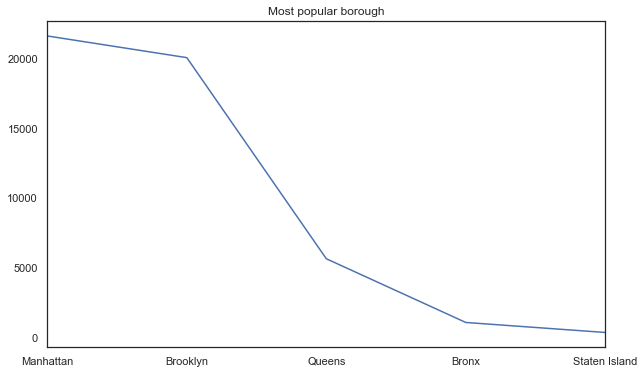

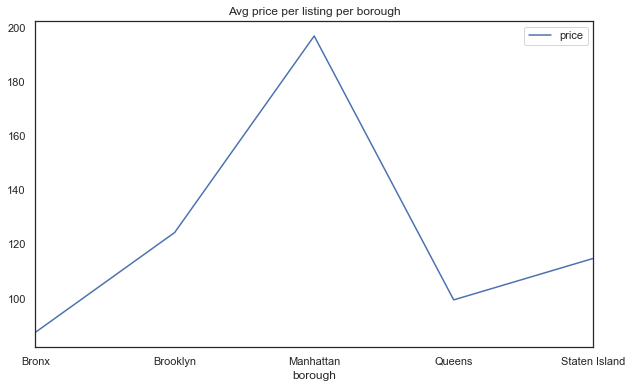

In [14]:
ax = counts.plot(kind='line', title='Most popular borough', figsize=(10, 6))
av = average.plot(kind='line', title='Avg price per listing per borough', figsize=(10, 6))

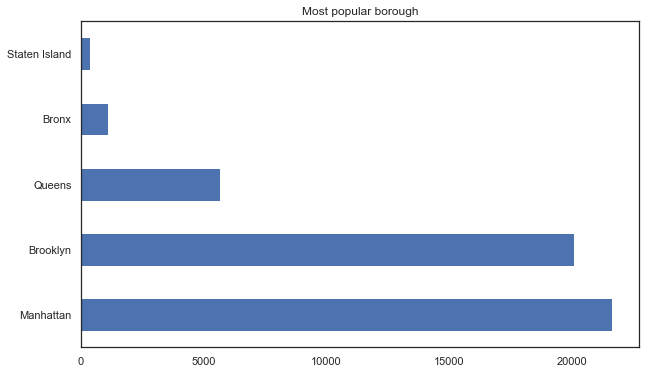

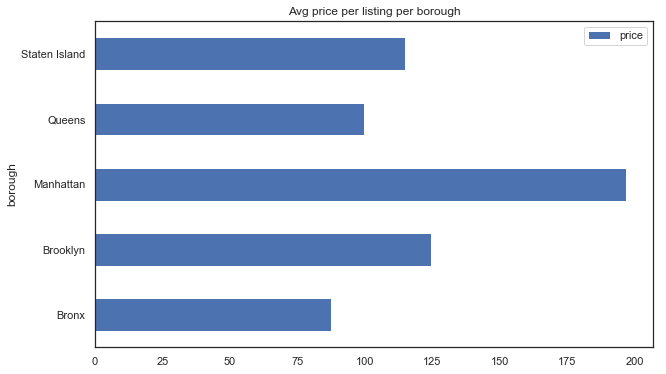

In [15]:
ax = counts.plot(kind='barh', title='Most popular borough', figsize=(10, 6))
av = average.plot(kind='barh', title='Avg price per listing per borough', figsize=(10, 6))
#how to organize it!!

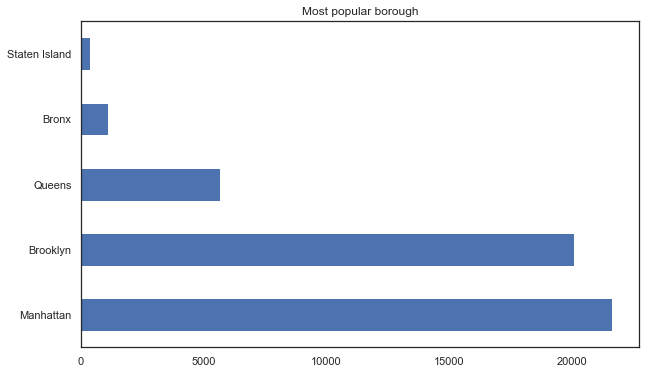

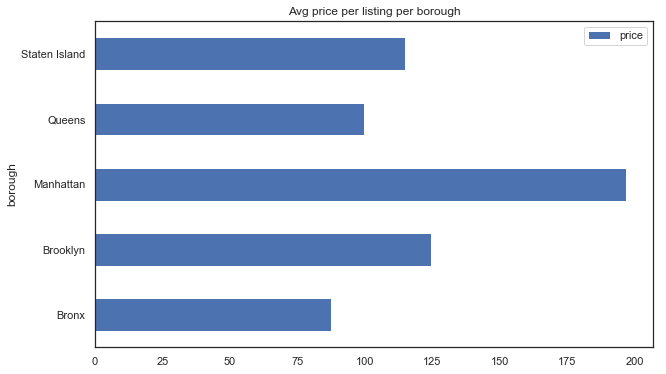

In [16]:
ax = counts.plot(kind='barh', title='Most popular borough', figsize=(10, 6))
av = average.plot(kind='barh', title='Avg price per listing per borough', figsize=(10, 6))
#how to organize it!!

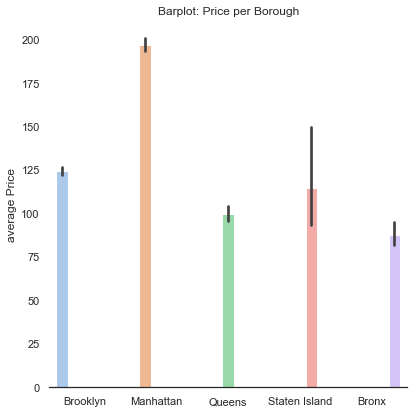

In [17]:
g = sns.catplot(x="borough", y="price", hue="borough", data=nyc,
                   height=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("average Price")
g.set_xlabels("")
plt.title('Barplot: Price per Borough')
plt.show()

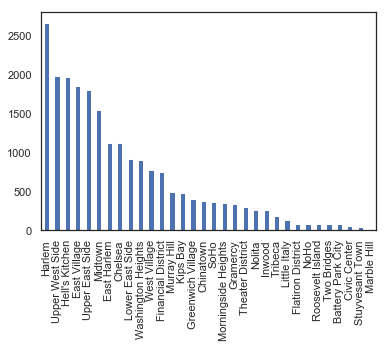

In [18]:
manhattan.hood.value_counts().plot(kind='bar')
#brooklyn.hood.value_counts().plot(kind='bar')
sns.set(style="ticks")  #Setting the overall aesthetic


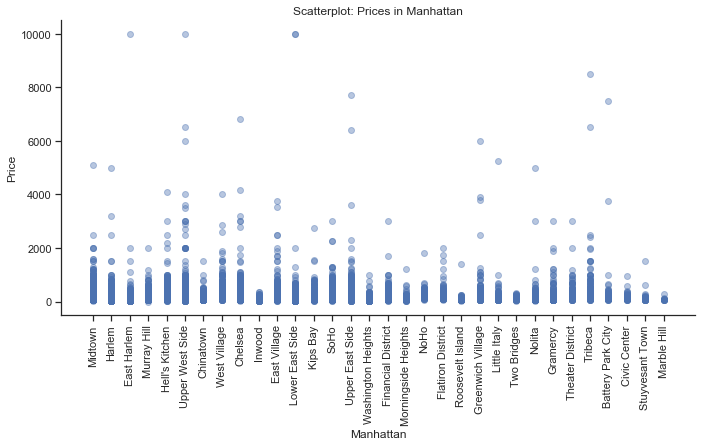

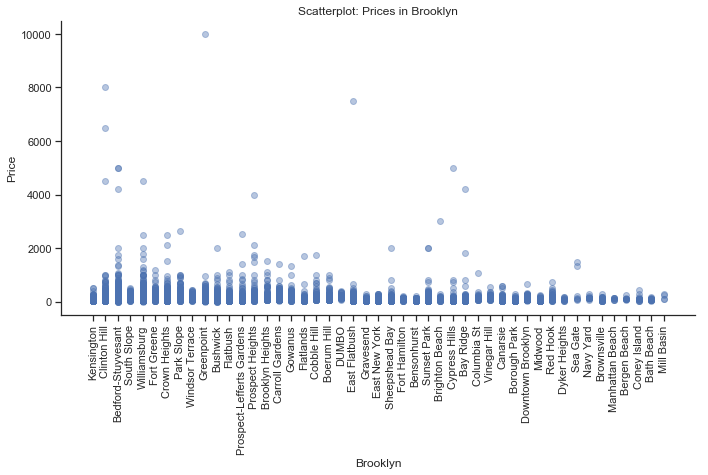

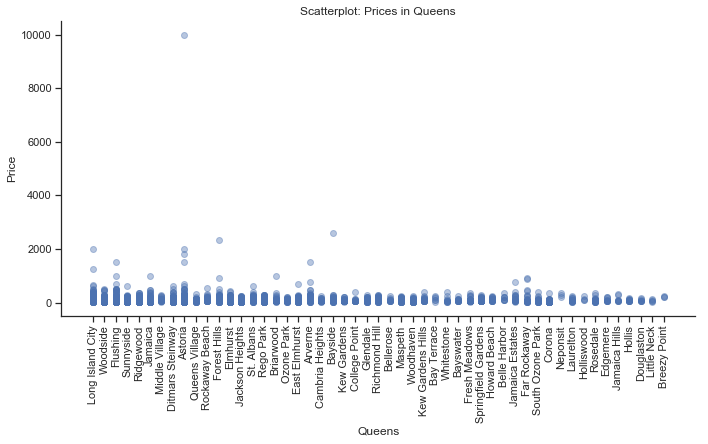

In [19]:
g = sns.lmplot(y='price', # Variable 1.
               x='hood', # Variable 2.
               data=manhattan,# Data
               aspect=2,
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlapping points.
g.set_ylabels("Price")
g.set_xlabels("Manhattan")
g.set_xticklabels(rotation=90)
plt.title('Scatterplot: Prices in Manhattan')
plt.show()

g = sns.lmplot(y='price', # Variable 1.
               x='hood', # Variable 2.
               data=brooklyn,# Data
               aspect=2,
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlapping points.
g.set_ylabels("Price")
g.set_xlabels("Brooklyn")
g.set_xticklabels(rotation=90)
plt.title('Scatterplot: Prices in Brooklyn')
plt.show()

g = sns.lmplot(y='price', # Variable 1.
               x='hood', # Variable 2.
               data=queens,# Data
               aspect=2,
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlapping points.
g.set_ylabels("Price")
g.set_xlabels("Queens")
g.set_xticklabels(rotation=90)
plt.title('Scatterplot: Prices in Queens')
plt.show()

In [45]:
countries = pd.read_csv('/Users/carandu/thinkful_projects/data_visualization_and_exploration/countries_of_the_world.csv')

In [46]:
countries.columns = ['country', 'region', 'population', 'area',
       'pop_density', 'coast_area_ratio',
       'net_migration', 'infant_mortality_per_1000',
       'gdp_per_capita', 'literacy', 'phones_per_1000', 'arable_%',
       'crops_%', 'other_%', 'climate', 'birthrate', 'deathrate',
       'agriculture', 'industry', 'service']
countries.head()

,country,region,population,area,pop_density,coast_area_ratio,net_migration,infant_mortality_per_1000,gdp_per_capita,literacy,phones_per_1000,arable_%,crops_%,other_%,climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [47]:
#How can I write a script for this??

#convert commas to periods...
countries['pop_density'] = countries['pop_density'].str.replace(',', '.')
countries['literacy'] = countries['literacy'].str.replace(',', '.')
countries['infant_mortality_per_1000'] = countries['infant_mortality_per_1000'].str.replace(',', '.')
countries['birthrate'] = countries['birthrate'].str.replace(',', '.')
countries['deathrate'] = countries['deathrate'].str.replace(',', '.')
#convert strings to floats...
countries['pop_density'] = countries['pop_density'].astype(float)
countries['literacy'] = countries['literacy'].astype(float)
countries['infant_mortality_per_1000'] = countries['infant_mortality_per_1000'].astype(float)
countries['birthrate'] = countries['birthrate'].astype(float)
countries['deathrate'] = countries['deathrate'].astype(float)
countries.dtypes

country                       object
region                        object
population                     int64
area                           int64
pop_density                  float64
coast_area_ratio              object
net_migration                 object
infant_mortality_per_1000    float64
gdp_per_capita               float64
literacy                     float64
phones_per_1000               object
arable_%                      object
crops_%                       object
other_%                       object
climate                       object
birthrate                    float64
deathrate                    float64
agriculture                   object
industry                      object
service                       object
dtype: object

In [48]:
#countries = countries.loc[:15]
#countries.head(100)
#latin_america = countries.loc[countries['region'] == 'LATIN AMER. & CARIB']
#latin_america = countries.loc[countries['region'].isin('LATIN AMER. & CARIB')]
latin_america = countries[countries['region'].str.match('LATIN AMER. & CARIB')]
eastern_europe = countries[countries['region'].str.match('EASTERN EUROPE')]
eastern_europe.head()

,country,region,population,area,pop_density,coast_area_ratio,net_migration,infant_mortality_per_1000,gdp_per_capita,literacy,phones_per_1000,arable_%,crops_%,other_%,climate,birthrate,deathrate,agriculture,industry,service
1,Albania,EASTERN EUROPE,3581655,28748,124.6,"1,26","-4,93",21.52,4500.0,86.5,"71,2","21,09","4,42","74,49",3,15.11,5.22,"0,232","0,188","0,579"
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,"0,04","0,31",21.05,6100.0,NaN,"215,4","13,6","2,96","83,44",4,8.77,8.27,"0,142","0,308","0,55"
30,Bulgaria,EASTERN EUROPE,7385367,110910,66.6,"0,32","-4,58",20.55,7600.0,98.6,"336,3","40,02","1,92","58,06",3,9.65,14.27,"0,093","0,304","0,603"
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,"10,32","1,58",6.84,10600.0,98.5,"420,4","26,09","2,27","71,65",NaN,9.61,11.48,"0,07","0,308","0,622"
53,Czech Republic,EASTERN EUROPE,10235455,78866,129.8,"0,00","0,97",3.93,15700.0,99.9,"314,3","39,8","3,05","57,15",3,9.02,10.59,"0,034","0,393","0,573"


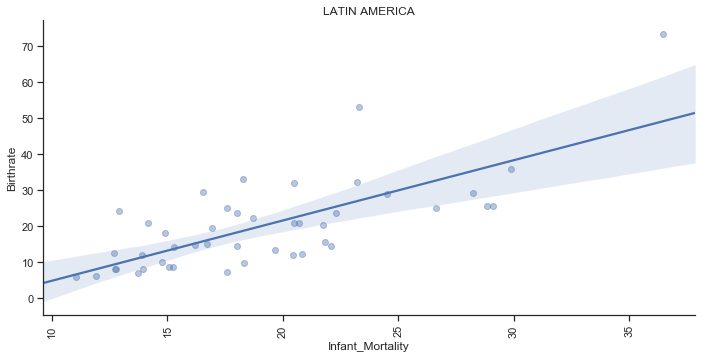

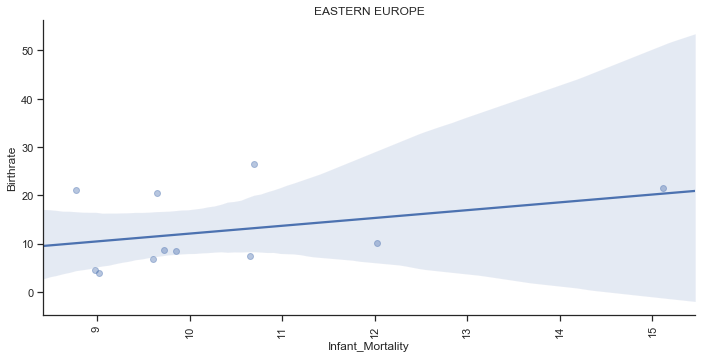

In [49]:
g = sns.lmplot(y='infant_mortality_per_1000', 
               x= 'birthrate',
               data=latin_america, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               aspect=2,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Birthrate")
g.set_xlabels("Infant_Mortality")
plt.title('LATIN AMERICA')
g.set_xticklabels(rotation=90)
plt.show()

g = sns.lmplot(y='infant_mortality_per_1000', 
               x= 'birthrate',
               data=eastern_europe, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               aspect=2,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Birthrate")
g.set_xlabels("Infant_Mortality")
plt.title('EASTERN EUROPE')
g.set_xticklabels(rotation=90)
plt.show()

In [228]:
countries = countries.groupby(['region','country']).agg({'population':'mean'}).reset_index()

In [50]:
countries.head()

,country,region,population,area,pop_density,coast_area_ratio,net_migration,infant_mortality_per_1000,gdp_per_capita,literacy,phones_per_1000,arable_%,crops_%,other_%,climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,"0,00","23,06",163.07,700.0,36.0,"3,2","12,13","0,22","87,65",1,46.60,20.34,"0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,124.6,"1,26","-4,93",21.52,4500.0,86.5,"71,2","21,09","4,42","74,49",3,15.11,5.22,"0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,"0,04","-0,39",31.00,6000.0,70.0,"78,1","3,22","0,25","96,53",1,17.14,4.61,"0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,290.4,"58,29","-20,71",9.27,8000.0,97.0,"259,5",10,15,75,2,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,"0,00","6,6",4.05,19000.0,100.0,"497,2","2,22",0,"97,78",3,8.71,6.25,NaN,NaN,NaN
